In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 12, 6

In [2]:
pd.options.mode.chained_assignment = None  # Suppress SettingWithCopyWarning

In [3]:
# loading dataset
df = pd.read_csv("Crime_Data_from_2020_to_Present.csv")

In [4]:
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807372,231604807,01/27/2023 12:00:00 AM,01/26/2023 12:00:00 AM,1800,16,Foothill,1663,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,12500 BRANFORD ST,NaN,34.2466,-118.4054
807373,231606525,03/22/2023 12:00:00 AM,03/22/2023 12:00:00 AM,1000,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,12800 FILMORE ST,NaN,34.2790,-118.4116
807374,231210064,04/12/2023 12:00:00 AM,04/12/2023 12:00:00 AM,1630,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,6100 S VERMONT AV,NaN,33.9841,-118.2915
807375,230115220,07/02/2023 12:00:00 AM,07/01/2023 12:00:00 AM,1,1,Central,154,1,352,PICKPOCKET,...,IC,Invest Cont,352.0,NaN,NaN,NaN,500 S MAIN ST,NaN,34.0467,-118.2485


## EDA

In [5]:
# Convert column to datetime format with a specific format
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])


In [6]:
df['dayofweek'] = df['DATE OCC'].dt.dayofweek  # add dow column
df['day'] = df['DATE OCC'].dt.day
df['month'] = df['DATE OCC'].dt.month

df[['DATE OCC','dayofweek','day','month']].head()


,DATE OCC,dayofweek,day,month
0,2020-01-08,2,8,1
1,2020-01-01,2,1,1
2,2020-02-13,3,13,2
3,2020-01-01,2,1,1
4,2020-01-01,2,1,1


## taking only the los angles data based on lat and lon

In [7]:


df_clean = df[(df.LON!=0) | (df.LAT!=0)]

In [8]:
df_clean[['LAT','LON']].head(20)

,LAT,LON
0,34.0141,-118.2978
1,34.0459,-118.2545
2,34.0448,-118.2474
3,34.1685,-118.4019
4,34.2198,-118.4468
5,34.0452,-118.2534
6,34.0483,-118.2631
7,34.0448,-118.2474
8,34.0677,-118.2398
9,34.2864,-118.5021


In [9]:
df_clean[['LAT','LON']].tail(20)

,LAT,LON
807357,34.2011,-118.5884
807358,34.1038,-118.3020
807359,34.0808,-118.1738
807360,34.1660,-118.3705
807361,34.1866,-118.5582
807362,33.9846,-118.4428
807363,34.1038,-118.3151
807364,34.0499,-118.3762
807365,34.2162,-118.3882
807366,34.1837,-118.4465


In [10]:
filtered_df = df_clean[(df_clean['LAT'] > 34.0)]
print(filtered_df[['LAT', 'LON']])

            LAT       LON
0       34.0141 -118.2978
1       34.0459 -118.2545
2       34.0448 -118.2474
3       34.1685 -118.4019
4       34.2198 -118.4468
...         ...       ...
807371  34.1381 -118.2115
807372  34.2466 -118.4054
807373  34.2790 -118.4116
807375  34.0467 -118.2485
807376  34.1951 -118.4487

[632997 rows x 2 columns]


In [11]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 632997 entries, 0 to 807376
Data columns (total 31 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DR_NO           632997 non-null  int64         
 1   Date Rptd       632997 non-null  object        
 2   DATE OCC        632997 non-null  datetime64[ns]
 3   TIME OCC        632997 non-null  int64         
 4   AREA            632997 non-null  int64         
 5   AREA NAME       632997 non-null  object        
 6   Rpt Dist No     632997 non-null  int64         
 7   Part 1-2        632997 non-null  int64         
 8   Crm Cd          632997 non-null  int64         
 9   Crm Cd Desc     632997 non-null  object        
 10  Mocodes         549641 non-null  object        
 11  Vict Age        632997 non-null  int64         
 12  Vict Sex        553689 non-null  object        
 13  Vict Descent    553684 non-null  object        
 14  Premis Cd       632990 non-null  flo

In [12]:
df_num = filtered_df.select_dtypes(include = "number")
df_num = df_num.fillna(0)

In [13]:
df_num

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON,dayofweek,day,month
0,10304468,2230,3,377,2,624,36,501.0,400.0,624.0,0.0,0.0,0.0,34.0141,-118.2978,2,8,1
1,190101086,330,1,163,2,624,25,102.0,500.0,624.0,0.0,0.0,0.0,34.0459,-118.2545,2,1,1
2,200110444,1200,1,155,2,845,0,726.0,0.0,845.0,0.0,0.0,0.0,34.0448,-118.2474,3,13,2
3,191501505,1730,15,1543,2,745,76,502.0,0.0,745.0,998.0,0.0,0.0,34.1685,-118.4019,2,1,1
4,191921269,415,19,1998,2,740,31,409.0,0.0,740.0,0.0,0.0,0.0,34.2198,-118.4468,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807371,231110961,1200,11,1115,2,745,47,704.0,0.0,745.0,0.0,0.0,0.0,34.1381,-118.2115,3,6,7
807372,231604807,1800,16,1663,2,740,23,122.0,0.0,740.0,0.0,0.0,0.0,34.2466,-118.4054,3,26,1
807373,231606525,1000,16,1602,1,230,25,102.0,400.0,230.0,0.0,0.0,0.0,34.2790,-118.4116,2,22,3
807375,230115220,1,1,154,1,352,24,735.0,0.0,352.0,0.0,0.0,0.0,34.0467,-118.2485,5,1,7


In [14]:
# #FEATURE IMPORTANCE BEFORE ENCODING USING ONLY THE NUMERICAL VALUES 
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_absolute_error
# from sklearn.ensemble import RandomForestClassifier
# from rfpimp import *

# X = df_num.drop('AREA',axis = 1)
# y = df_num['AREA']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

# rf = RandomForestClassifier(n_estimators=100)
# rf.fit(X_train, y_train)
# I = importances(rf, X_test, y_test)
# I

In [15]:
# #FEATURE IMPORTANCE BEFORE ENCODING USING ONLY THE NUMERICAL VALUES 
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_absolute_error
# from sklearn.ensemble import RandomForestRegressor
# from rfpimp import *

# X = df_num.drop('AREA',axis = 1)
# y = df_num['AREA']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

# rf = RandomForestRegressor(n_estimators=100)
# rf.fit(X_train, y_train)
# I = importances(rf, X_test, y_test)
# I

In [16]:
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.model_selection import train_test_split
# from rfpimp import *

# # Assuming df_num contains only numerical features and 'AREA' is the target column
# X = df_num.drop('AREA', axis=1)
# y = df_num['AREA']

# # Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize and train Gradient Boosting model
# gbm = GradientBoostingClassifier(n_estimators=100)
# gbm.fit(X_train, y_train)

# # Calculate feature importances
# I = importances(gbm, X_test, y_test)
# print(I)


In [17]:
filtered_df.shape

(632997, 31)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807377 entries, 0 to 807376
Data columns (total 31 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DR_NO           807377 non-null  int64         
 1   Date Rptd       807377 non-null  object        
 2   DATE OCC        807377 non-null  datetime64[ns]
 3   TIME OCC        807377 non-null  int64         
 4   AREA            807377 non-null  int64         
 5   AREA NAME       807377 non-null  object        
 6   Rpt Dist No     807377 non-null  int64         
 7   Part 1-2        807377 non-null  int64         
 8   Crm Cd          807377 non-null  int64         
 9   Crm Cd Desc     807377 non-null  object        
 10  Mocodes         696010 non-null  object        
 11  Vict Age        807377 non-null  int64         
 12  Vict Sex        701468 non-null  object        
 13  Vict Descent    701460 non-null  object        
 14  Premis Cd       807368 non-null  flo

In [19]:
## AREA,Crm cd, Vict Age, Vict Sex, Vict Descent, Premis Cd, Status

In [20]:
crime=filtered_df[['Rpt Dist No','AREA','Vict Age','Vict Sex','Vict Descent','Crm Cd','Premis Cd','Status','dayofweek','day','month']]
crime.head(20)

,Rpt Dist No,AREA,Vict Age,Vict Sex,Vict Descent,Crm Cd,Premis Cd,Status,dayofweek,day,month
0,377,3,36,F,B,624,501.0,AO,2,8,1
1,163,1,25,M,H,624,102.0,IC,2,1,1
2,155,1,0,X,X,845,726.0,AA,3,13,2
3,1543,15,76,F,W,745,502.0,IC,2,1,1
4,1998,19,31,X,X,740,409.0,IC,2,1,1
5,163,1,25,F,H,121,735.0,IC,2,1,1
6,161,1,23,M,H,442,404.0,IC,3,2,1
7,155,1,0,X,X,946,726.0,IC,5,4,1
8,101,1,23,M,B,341,502.0,IC,5,4,1
9,1708,17,0,X,X,341,203.0,AO,1,26,5


In [21]:
crime['Rpt Dist No'].nunique()

1020

In [22]:
#checking the missing value in crime dataframe
crime.isnull().sum()

Rpt Dist No         0
AREA                0
Vict Age            0
Vict Sex        79308
Vict Descent    79313
Crm Cd              0
Premis Cd           7
Status              0
dayofweek           0
day                 0
month               0
dtype: int64

In [23]:
crime["Rpt Dist No"].head(20)

0      377
1      163
2      155
3     1543
4     1998
5      163
6      161
7      155
8      101
9     1708
10     192
11     111
12     162
13     162
14     128
15    1916
16    1124
18     932
19     152
20     909
Name: Rpt Dist No, dtype: int64

In [24]:
# from sklearn.preprocessing import MinMaxScaler

# # Extract the column as a 2D array because MinMaxScaler expects a 2D array
# data = crime["Rpt Dist No"].values.reshape(-1, 1)

# # Initialize the MinMaxScaler
# scaler = MinMaxScaler()

# # Fit the scaler to the data and transform the data
# scaled_data = scaler.fit_transform(data)

# # Convert the scaled data back to a pandas Series
# scaled_series = pd.Series(scaled_data.flatten())

# # Replace the original column with the scaled values
# crime["Rpt Dist No"] = scaled_series

# # Display the first few rows to verify the transformation
# print(crime["Rpt Dist No"].head(20))


In [25]:
crime['Rpt Dist No'].nunique()

1020

In [26]:
def sniff(df):
    with pd.option_context("display.max_colwidth", 20):
        info = pd.DataFrame()
        info['sample'] = df.iloc[0]
        info['data type'] = df.dtypes
        info['percent missing'] = df.isnull().sum()*100/len(df)
        return info.sort_values('data type')

In [27]:
sniff(crime)

,sample,data type,percent missing
Rpt Dist No,377,int64,0.000000
AREA,3,int64,0.000000
Vict Age,36,int64,0.000000
Crm Cd,624,int64,0.000000
dayofweek,2,int64,0.000000
day,8,int64,0.000000
month,1,int64,0.000000
Premis Cd,501.0,float64,0.001106
Vict Sex,F,object,12.528969
Vict Descent,B,object,12.529759


## CLEANING

In [28]:
#crime['AREA'] = crime['AREA'].astype(str)


In [29]:
crime['Premis Cd'].unique()

array([501., 102., 726., 502., 409., 735., 404., 203., 101., 108., 503.,
       252., 103., 507., 148., 707., 801., 510., 401., 122., 406., 514.,
       900., 210., 902., 403., 725., 516., 123., 701., 402., 834., 517.,
       207., 151., 753., 710., 248., 405., 602., 931., 116., 741., 118.,
       719., 903., 202., 244., 744., 802., 504., 124., 917., 201., 733.,
       738., 706., 916., 901., 152., 727., 212., 109., 717., 508., 121.,
       119., 966., 218., 104., 810., 220., 413., 835., 301., 221., 722.,
       713., 222., 702., 506., 703., 940., 757., 811., 754., 715., 113.,
       106., 728., 235., 135., 114., 111., 720., 708., 906., 904., 216.,
       723., 138., 110., 704., 721., 907., 243., 156., 750., 729., 217.,
       120., 242., 255., 145., 509., 515., 505., 946., 408., 232., 251.,
       947., 949., 237., 518., 231., 247., 943., 712., 945., 944., 605.,
       213., 968., 238., 254., 229., 411., 146., 868., 127., 249., 809.,
       412., 417., 415., 418., 709., 752., 732., 73

In [30]:
crime['Vict Age'].unique()

array([ 36,  25,   0,  76,  31,  23,  29,  35,  41,  24,  34,  46,  66,
        40,  27,  62,  43,  71,  50,  19,  51,  33,  69,  39,  57,  78,
        52,  38,  55,  44,  18,  54,  22,  28,  42,  56,  67,  37,  60,
        61,  59,  32,  30,  45,  20,  58,  47,  48,  26,  21,  64,  75,
        12,  49,  68,  14,  13,  53,  74,  65,  16,  72,  63,  70,   9,
        15,  17,  90,  85,  81,  79,  94,  73,  80,   5,  11,  82,   2,
        77,  84,  88,  96,  99,  86,   7,  10,  92,   3,  83,  87,   6,
        -1,   8,  89,   4,  93,  98,  91,  95,  -2,  97, 120,  -3],
      dtype=int64)

In [31]:
crime.dropna(subset=['Rpt Dist No','Vict Descent', 'Vict Sex', 'Premis Cd'],inplace=True)

In [32]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 553680 entries, 0 to 807376
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Rpt Dist No   553680 non-null  int64  
 1   AREA          553680 non-null  int64  
 2   Vict Age      553680 non-null  int64  
 3   Vict Sex      553680 non-null  object 
 4   Vict Descent  553680 non-null  object 
 5   Crm Cd        553680 non-null  int64  
 6   Premis Cd     553680 non-null  float64
 7   Status        553680 non-null  object 
 8   dayofweek     553680 non-null  int64  
 9   day           553680 non-null  int64  
 10  month         553680 non-null  int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 50.7+ MB


In [33]:
crime['Premis Cd'] = crime['Premis Cd'].astype('int64')

In [34]:
crime

,Rpt Dist No,AREA,Vict Age,Vict Sex,Vict Descent,Crm Cd,Premis Cd,Status,dayofweek,day,month
0,377,3,36,F,B,624,501,AO,2,8,1
1,163,1,25,M,H,624,102,IC,2,1,1
2,155,1,0,X,X,845,726,AA,3,13,2
3,1543,15,76,F,W,745,502,IC,2,1,1
4,1998,19,31,X,X,740,409,IC,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...
807371,1115,11,47,M,F,745,704,IC,3,6,7
807372,1663,16,23,M,H,740,122,IC,3,26,1
807373,1602,16,25,F,H,230,102,IC,2,22,3
807375,154,1,24,F,H,352,735,IC,5,1,7


In [35]:
crime['Status'].unique()

array(['AO', 'IC', 'AA', 'JA', 'JO', 'CC'], dtype=object)

In [36]:
crime.describe()

,Rpt Dist No,AREA,Vict Age,Crm Cd,Premis Cd,dayofweek,day,month
count,553680.000000,553680.000000,553680.000000,553680.000000,553680.00000,553680.000000,553680.000000,553680.000000
mean,1062.396086,10.161998,34.457959,500.462711,335.45458,3.018384,15.300852,6.192454
std,640.276613,6.405730,19.812435,219.919533,217.13307,1.987820,8.950332,3.344553
min,101.000000,1.000000,-3.000000,110.000000,101.00000,0.000000,1.000000,1.000000
25%,467.000000,4.000000,24.000000,330.000000,108.00000,1.000000,7.000000,3.000000
50%,974.000000,9.000000,34.000000,440.000000,402.00000,3.000000,15.000000,6.000000
75%,1617.000000,16.000000,48.000000,649.000000,502.00000,5.000000,23.000000,9.000000
max,2199.000000,21.000000,99.000000,956.000000,976.00000,6.000000,31.000000,12.000000


In [37]:
crime = crime[crime['Vict Age'] >= 1]
crime = crime[crime['Vict Sex'] != 'H']

In [38]:
crime.describe()

,Rpt Dist No,AREA,Vict Age,Crm Cd,Premis Cd,dayofweek,day,month
count,480452.000000,480452.000000,480452.000000,480452.000000,480452.000000,480452.000000,480452.000000,480452.000000
mean,1065.377952,10.191089,39.704360,499.413665,336.429416,3.023894,15.226845,6.198648
std,646.034438,6.463783,15.620404,220.021593,218.331297,1.990703,8.956629,3.350257
min,101.000000,1.000000,2.000000,110.000000,101.000000,0.000000,1.000000,1.000000
25%,459.000000,4.000000,28.000000,330.000000,104.000000,1.000000,7.000000,3.000000
50%,971.000000,9.000000,37.000000,440.000000,404.000000,3.000000,15.000000,6.000000
75%,1636.000000,16.000000,50.000000,626.000000,502.000000,5.000000,23.000000,9.000000
max,2199.000000,21.000000,99.000000,956.000000,976.000000,6.000000,31.000000,12.000000


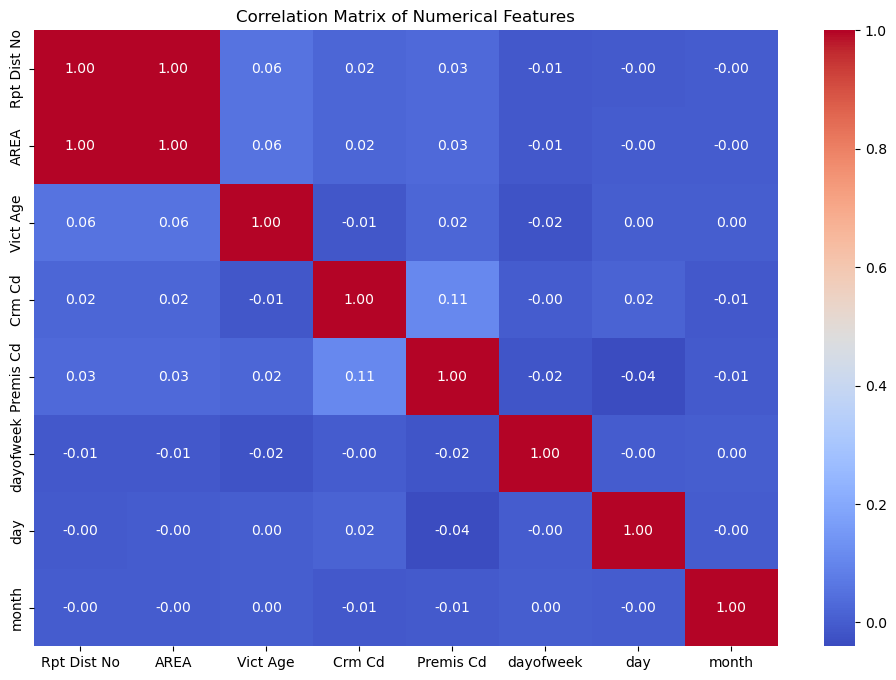

In [39]:
numerical_features = crime.select_dtypes(include='number')

# Construct the correlation matrix
correlation_matrix = numerical_features.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

In [40]:
crime['Vict Descent'].unique()

array(['B', 'H', 'W', 'X', 'A', 'O', 'C', 'F', 'K', 'I', 'V', 'Z', 'J',
       'P', 'G', 'U', 'D', 'S', 'L', '-'], dtype=object)

In [41]:
crime = crime[crime['Vict Descent'] != '-']

In [42]:
crime['Vict Descent'].unique()

array(['B', 'H', 'W', 'X', 'A', 'O', 'C', 'F', 'K', 'I', 'V', 'Z', 'J',
       'P', 'G', 'U', 'D', 'S', 'L'], dtype=object)

In [43]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480451 entries, 0 to 807376
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Rpt Dist No   480451 non-null  int64 
 1   AREA          480451 non-null  int64 
 2   Vict Age      480451 non-null  int64 
 3   Vict Sex      480451 non-null  object
 4   Vict Descent  480451 non-null  object
 5   Crm Cd        480451 non-null  int64 
 6   Premis Cd     480451 non-null  int64 
 7   Status        480451 non-null  object
 8   dayofweek     480451 non-null  int64 
 9   day           480451 non-null  int64 
 10  month         480451 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 44.0+ MB


In [44]:
crime['Vict Sex'].unique()

array(['F', 'M', 'X'], dtype=object)

## Because our data is more than 400k it take's too much time to predict so we are choosing the last recent 100k records 

In [45]:
crime = crime.iloc[-100_000:] # take only last 100,000 records

In [46]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 635850 to 807376
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Rpt Dist No   100000 non-null  int64 
 1   AREA          100000 non-null  int64 
 2   Vict Age      100000 non-null  int64 
 3   Vict Sex      100000 non-null  object
 4   Vict Descent  100000 non-null  object
 5   Crm Cd        100000 non-null  int64 
 6   Premis Cd     100000 non-null  int64 
 7   Status        100000 non-null  object
 8   dayofweek     100000 non-null  int64 
 9   day           100000 non-null  int64 
 10  month         100000 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 9.2+ MB


## Running a random forest model before <U>encoding </U> and its validation score

In [47]:
from sklearn.model_selection import train_test_split

X = crime.select_dtypes(include=['number']).drop('AREA',axis = 1)
y = crime['AREA']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [48]:
print(crime.columns)


Index(['Rpt Dist No', 'AREA', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Crm Cd',
       'Premis Cd', 'Status', 'dayofweek', 'day', 'month'],
      dtype='object')


In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

cl = RandomForestClassifier()
cl.fit(X_train, y_train)


# Model evaluation
y_pred = cl.predict(X_test)
validation_e = cl.score(X_test, y_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(f"{validation_e*100:.2f}% correct")
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.978
97.80% correct
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1421
           2       1.00      1.00      1.00       889
           3       1.00      1.00      1.00      1209
           4       1.00      1.00      1.00       624
           6       1.00      1.00      1.00       924
           7       0.99      1.00      0.99       904
           8       0.99      0.98      0.99       813
           9       0.98      0.99      0.99       885
          10       0.97      0.98      0.97       828
          11       0.92      0.97      0.94       752
          12       1.00      0.12      0.21        60
          13       0.91      0.95      0.93       626
          14       0.93      0.67      0.78       285
          15       0.90      0.99      0.94       880
          16       0.98      0.91      0.94       612
          17       0.97      0.98      0.97       743
          19       0.99   

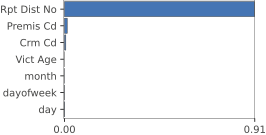

In [50]:
from rfpimp import *
I = importances(cl, X_test, y_test)
plot_importances(I, color='#4575b4', vscale=1.4)

In [51]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators = 2000)
gbr.fit(X_train, y_train)
print(f"GB Training score {gbr.score(X_train, y_train):.4f}")
print(f"GB Validation score {gbr.score(X_test, y_test):.4f}")

GB Training score 1.0000
GB Validation score 1.0000


getting a baseline 

In [52]:
#baseline model
numfeatures = ['Rpt Dist No','Vict Age', 'Crm Cd', 'Premis Cd', 'dayofweek','day','month']
X, y = crime[numfeatures], crime['AREA']
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, oob_score=True)
rf.fit(X, y)
oob_baseline = rf.oob_score_
print(oob_baseline)

0.97396


In [53]:
#copying the data
crime_coded= crime.copy()

In [54]:
#!pip install category_encoders

### creating a function

In [55]:
def test(X, y):
    rf = RandomForestClassifier(oob_score=True)
    rf.fit(X, y)
    oob = rf.oob_score_
    n = rfnnodes(rf)
    h = np.median(rfmaxdepths(rf))
    print(f"OOB R^2 {oob:.5f} using {n:,d} tree nodes with {h} median tree height")
    return rf, oob

In [56]:
#target encoding
from category_encoders.target_encoder import TargetEncoder
#crime_coded = crime_coded.reset_index() # not sure why TargetEncoder needs this but it does
targetfeatures = ['Vict Descent']
encoder = TargetEncoder(cols=targetfeatures)
encoder.fit(crime_coded, crime_coded['AREA'])
df_encoded = encoder.transform(crime_coded, crime_coded['AREA'])

X, y = df_encoded[targetfeatures+numfeatures], crime_coded['AREA']
rf, oob = test(X, y)

OOB R^2 0.95544 using 4,109,726 tree nodes with 39.0 median tree height


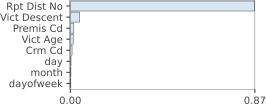

In [57]:
I = importances(rf, X, y)
plot_importances(I)

## Encoding categorical variables 

#### using one - hot encoding

In [58]:
import pandas as pd

# Use pandas get_dummies() function to perform one-hot encoding
one_hot_encoded = pd.get_dummies(crime['Vict Sex'], prefix='Vict_Sex')

# Concatenate the one-hot encoded DataFrame with the original DataFrame
crime = pd.concat([crime, one_hot_encoded], axis=1)

# Drop the original 'Vict Sex' column as it's no longer needed after encoding
crime.drop('Vict Sex', axis=1, inplace=True)

# Display the updated DataFrame
print(crime.head())

        Rpt Dist No  AREA  Vict Age Vict Descent  Crm Cd  Premis Cd Status  \
635850         2069    20        27            H     442        203     IC   
635851          161     1        21            H     230        108     IC   
635852         1983    19        48            H     354        502     IC   
635853          129     1        39            A     440        702     IC   
635857          946     9        46            X     740        502     IC   

        dayofweek  day  month  Vict_Sex_F  Vict_Sex_M  Vict_Sex_X  
635850          0   29      8           1           0           0  
635851          6   17      4           0           1           0  
635852          0    3     10           1           0           0  
635853          4    2     12           1           0           0  
635857          2   20      7           0           1           0  


This code defines two functions df_string_to_cat and df_cat_to_catcode for handling categorical data in a pandas DataFrame. Here's an explanation of each function:

df_string_to_cat(df):

This function takes a pandas DataFrame df as input.
It iterates over each column in the DataFrame using for col in df.columns.
For each column, it checks if the data type is string using is_string_dtype(df[col]) from pandas.api.types.
If the data type is string, it converts it to a categorical type using astype('category').
The .cat.as_ordered() method ensures that the categories are ordered based on the order they appear in the data.
So, essentially, this function converts string columns in the DataFrame to categorical columns.
df_cat_to_catcode(df):

This function also takes a pandas DataFrame df as input.
Similar to the previous function, it iterates over each column in the DataFrame.
For each column, it checks if the data type is categorical using is_categorical_dtype(df[col]).
If the data type is categorical, it converts the categories to integer codes using .cat.codes.
The + 1 is added to ensure that the codes start from 1 instead of 0.
So, this function converts categorical columns in the DataFrame to integer codes.
Overall, these functions are useful for preprocessing categorical data in a pandas DataFrame, converting string columns to categorical type and then converting categorical type to integer codes. This can be helpful before applying machine learning algorithms that require numerical input data.

#### categorical encoding

In [59]:
from pandas.api.types import is_categorical_dtype
from pandas.api.types import is_string_dtype

def df_string_to_cat(df):
    for col in df.columns:
        if is_string_dtype(df[col]):
            df[col] = df[col].astype('category').cat.as_ordered()

def df_cat_to_catcode(df):
    for col in df.columns:
        if is_categorical_dtype(df[col]):
            df[col] = df[col].cat.codes + 1

In [60]:
df_string_to_cat(crime)

df_cat_to_catcode(crime)
crime.head(10)

,Rpt Dist No,AREA,Vict Age,Vict Descent,Crm Cd,Premis Cd,Status,dayofweek,day,month,Vict_Sex_F,Vict_Sex_M,Vict_Sex_X
635850,2069,20,27,7,442,203,4,0,29,8,1,0,0
635851,161,1,21,7,230,108,4,6,17,4,0,1,0
635852,1983,19,48,7,354,502,4,0,3,10,1,0,0
635853,129,1,39,1,440,702,4,4,2,12,1,0,0
635857,946,9,46,18,740,502,4,2,20,7,0,1,0
635860,1918,19,58,7,740,122,4,6,18,12,0,1,0
635861,2088,20,52,18,230,101,1,6,13,11,0,0,1
635862,248,2,22,7,354,502,4,2,2,11,1,0,0
635863,334,3,41,2,354,501,4,4,2,12,1,0,0
635866,394,3,90,17,624,501,2,6,1,5,0,1,0


In [61]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 635850 to 807376
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   Rpt Dist No   100000 non-null  int64
 1   AREA          100000 non-null  int64
 2   Vict Age      100000 non-null  int64
 3   Vict Descent  100000 non-null  int8 
 4   Crm Cd        100000 non-null  int64
 5   Premis Cd     100000 non-null  int64
 6   Status        100000 non-null  int8 
 7   dayofweek     100000 non-null  int64
 8   day           100000 non-null  int64
 9   month         100000 non-null  int64
 10  Vict_Sex_F    100000 non-null  uint8
 11  Vict_Sex_M    100000 non-null  uint8
 12  Vict_Sex_X    100000 non-null  uint8
dtypes: int64(8), int8(2), uint8(3)
memory usage: 7.3 MB


##### creating a model using test function

In [62]:
from sklearn.model_selection import train_test_split

X = crime.drop('AREA',axis = 1)
y = crime['AREA']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
rf, oob = test(X, y)

OOB R^2 0.95570 using 4,017,370 tree nodes with 40.0 median tree height


In [63]:
X_train

,Rpt Dist No,Vict Age,Vict Descent,Crm Cd,Premis Cd,Status,dayofweek,day,month,Vict_Sex_F,Vict_Sex_M,Vict_Sex_X
692258,915,75,12,740,118,4,4,12,5,0,1,0
752769,245,48,2,210,502,4,6,6,8,0,1,0
723550,1331,31,7,900,501,4,5,13,5,1,0,0
641746,1998,54,2,310,221,4,5,15,1,0,1,0
782683,1426,47,7,440,502,4,4,9,6,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
755518,378,25,7,440,712,4,5,5,8,0,1,0
669089,1024,49,7,761,101,4,5,22,7,1,0,0
807257,1035,73,17,310,501,4,6,20,8,1,0,0
646733,1127,67,7,901,501,2,6,18,6,1,0,0


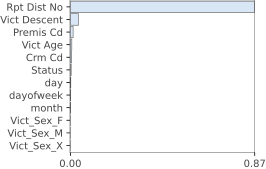

In [64]:
I = importances(rf, X, y)
plot_importances(I)

In [65]:
from sklearn.model_selection import train_test_split

X = crime.drop('AREA',axis = 1)
y = crime['AREA']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


# Model selection and training
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [66]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
# Make predictions on the test set
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
f1 = f1_score(y_test, y_pred,average='weighted')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.9713
Precision: 0.9713913489311821
Recall: 0.9713
F1 Score: 0.9699280705761268


In [67]:
y_pred

array([ 2,  1, 19, ..., 19, 21, 21], dtype=int64)

In [68]:
len(X_train)

80000

In [69]:
crime.head(10)

,Rpt Dist No,AREA,Vict Age,Vict Descent,Crm Cd,Premis Cd,Status,dayofweek,day,month,Vict_Sex_F,Vict_Sex_M,Vict_Sex_X
635850,2069,20,27,7,442,203,4,0,29,8,1,0,0
635851,161,1,21,7,230,108,4,6,17,4,0,1,0
635852,1983,19,48,7,354,502,4,0,3,10,1,0,0
635853,129,1,39,1,440,702,4,4,2,12,1,0,0
635857,946,9,46,18,740,502,4,2,20,7,0,1,0
635860,1918,19,58,7,740,122,4,6,18,12,0,1,0
635861,2088,20,52,18,230,101,1,6,13,11,0,0,1
635862,248,2,22,7,354,502,4,2,2,11,1,0,0
635863,334,3,41,2,354,501,4,4,2,12,1,0,0
635866,394,3,90,17,624,501,2,6,1,5,0,1,0


In [70]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.9648  0.96655 0.96965 0.96835 0.9703 ]
Mean Accuracy: 0.9679300000000002


In [71]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score


# Assuming X_train, X_test, y_train, y_test are your training and testing data
X = crime[['Vict Age', 'Vict Descent', 'Crm Cd', 'Premis Cd', 'dayofweek', 'month', 'Vict_Sex_F', 'Vict_Sex_M', 'Vict_Sex_X']]
y = crime['AREA']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gbc = GradientBoostingClassifier(n_estimators=100)
gbc.fit(X_train, y_train)

# Predictions
y_pred_train = gbc.predict(X_train)
y_pred_test = gbc.predict(X_test)

# Accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Gradient Boosting Classifier Training Accuracy: {train_accuracy:.4f}")
print(f"Gradient Boosting Classifier Test Accuracy: {test_accuracy:.4f}")

Gradient Boosting Classifier Training Accuracy: 0.2243
Gradient Boosting Classifier Test Accuracy: 0.2033
